In [48]:
import pandas as pd
import streamlit as st
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
df = pd.read_csv('data/bank_churn.csv')

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.shape

(10000, 14)

In [12]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Data Cleaning 

In [14]:
# Drop unnecessary columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
# Identify and display the duplicate rows
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print('**Duplicate Rows**')
    print(duplicates)
else:
    print('No duplicate rows found.')

No duplicate rows found.


In [20]:
df1 = df.copy()

In [21]:
# Convert categorical variables to numerical using label encoding
df1['Gender'] = df1['Gender'].map({'Female': 0, 'Male': 1})

In [22]:
# Convert categorical variables to one-hot encoding
df1 = pd.get_dummies(df1, columns=['Geography'], drop_first=True)

### Explorative Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

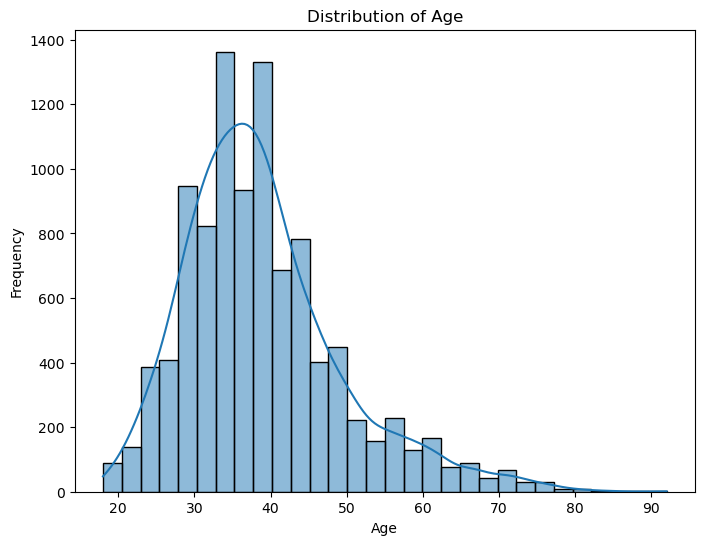

In [24]:
# Plot histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show

C:\Users\Hp 2022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

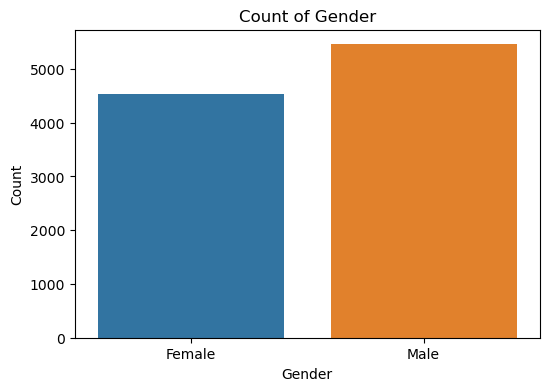

In [25]:
# Plot bar chart of Gender
plt.figure(figsize=(6, 4))
sns.countplot(df['Gender'])
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show

C:\Users\Hp 2022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

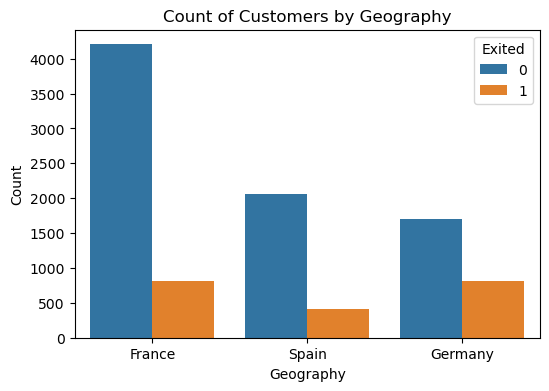

In [27]:
# Plot bar chart of Geography
plt.figure(figsize=(6, 4))
sns.countplot(df['Geography'], hue=df['Exited'])
plt.title('Count of Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

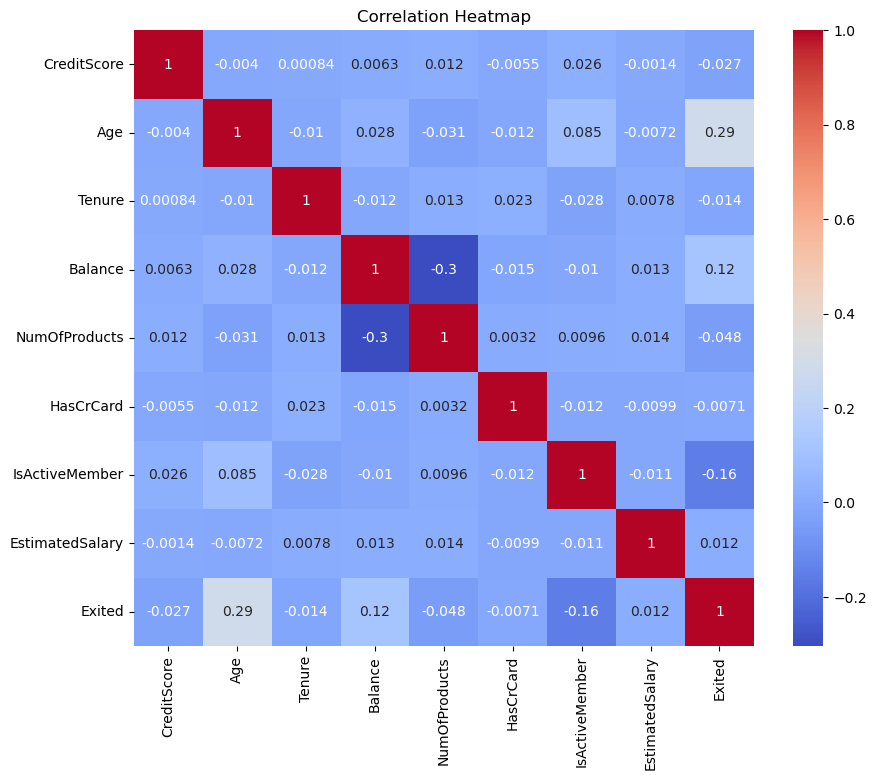

In [28]:
# Plot heatmap of correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show

#### Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

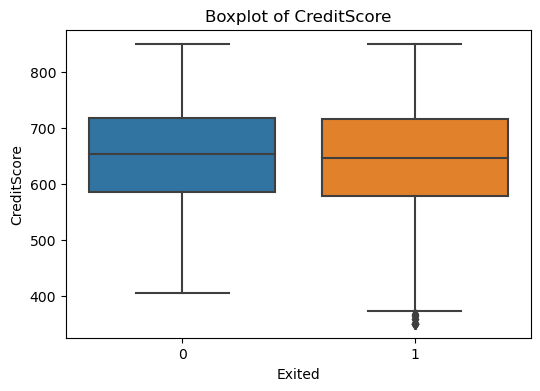

In [34]:
# Plot boxplot of the column
plt.figure(figsize=(6, 4))
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title(f'Boxplot of CreditScore')
plt.xlabel('Exited')
plt.ylabel('CreditScore')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

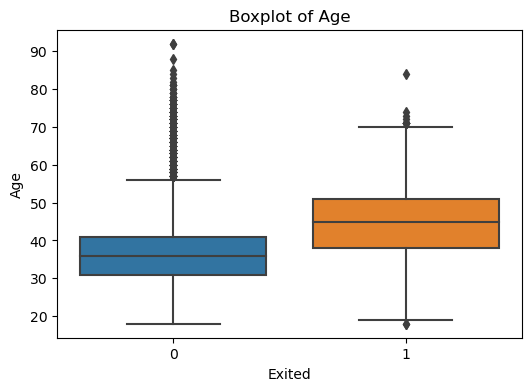

In [35]:
# Plot boxplot of the column
plt.figure(figsize=(6, 4))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title(f'Boxplot of Age')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

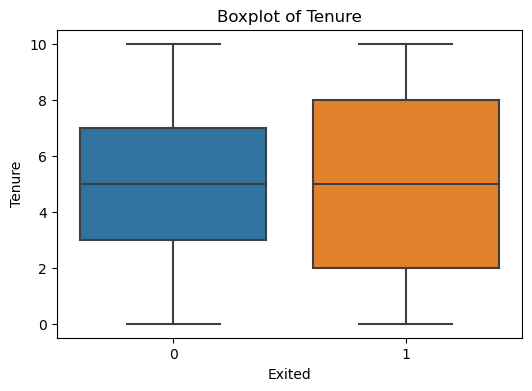

In [36]:
# Plot boxplot of the column
plt.figure(figsize=(6, 4))
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.title(f'Boxplot of Tenure')
plt.xlabel('Exited')
plt.ylabel('Tenure')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

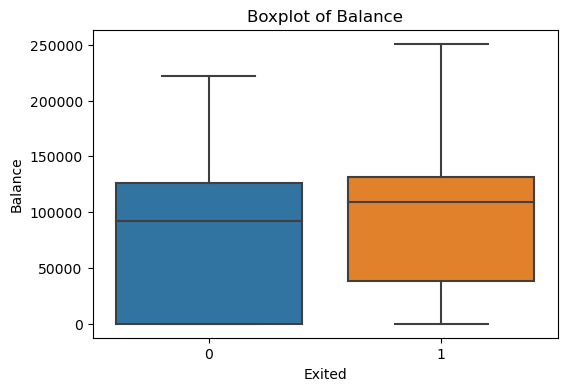

In [37]:
# Plot boxplot of the column
plt.figure(figsize=(6, 4))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title(f'Boxplot of Balance')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

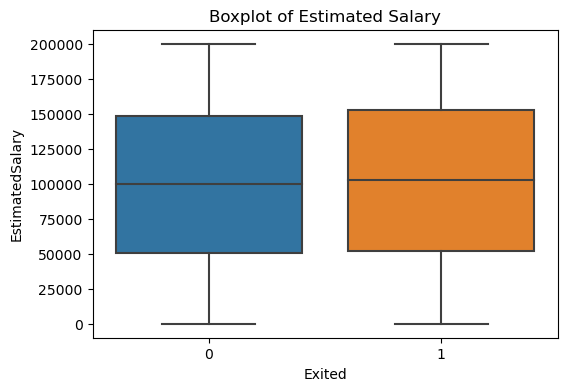

In [38]:
# Plot boxplot of the column
plt.figure(figsize=(6, 4))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title(f'Boxplot of Estimated Salary')
plt.xlabel('Exited')
plt.ylabel('EstimatedSalary')
plt.show

#### Bivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

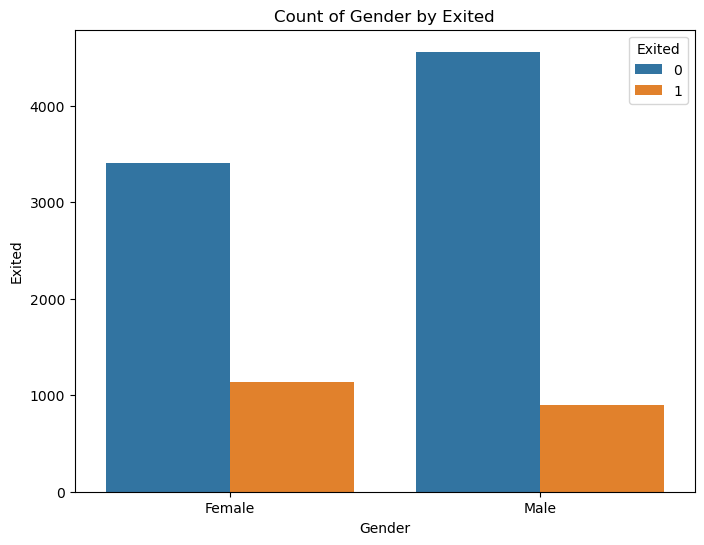

In [42]:
# Plot bar chart of column1 by column2
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title(f'Count of Gender by Exited')
plt.xlabel('Gender')
plt.ylabel('Exited')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

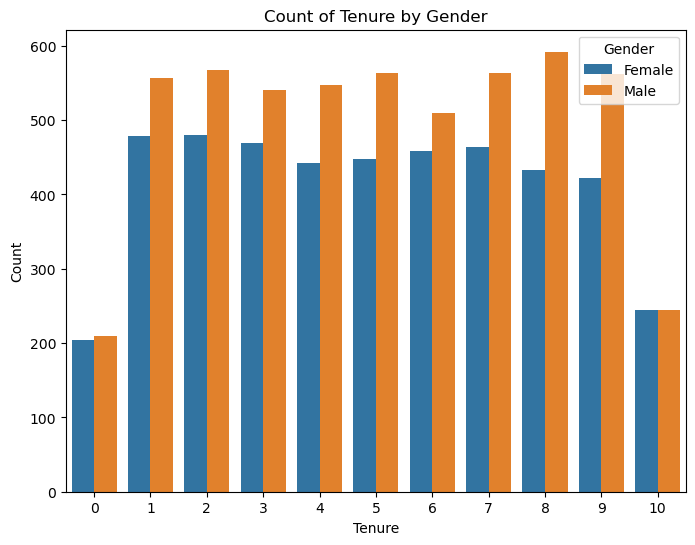

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Tenure', hue='Gender', data=df)
plt.title(f'Count of Tenure by Gender')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

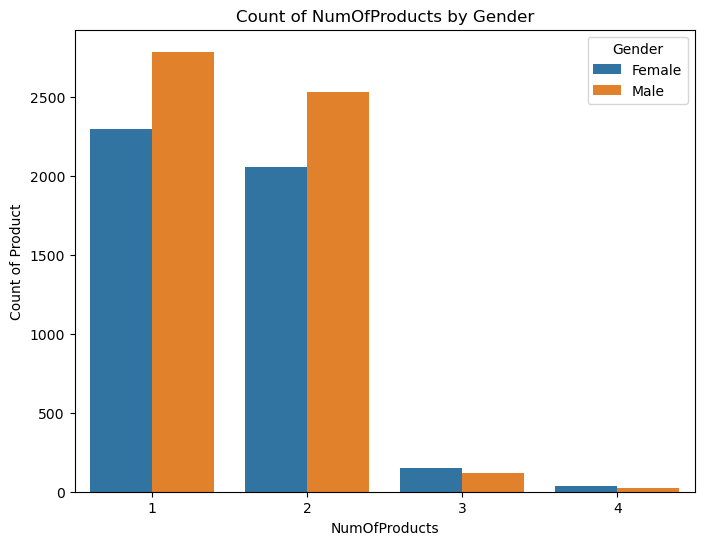

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', hue='Gender', data=df)
plt.title(f'Count of NumOfProducts by Gender')
plt.xlabel('NumOfProducts')
plt.ylabel('Count of Product')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

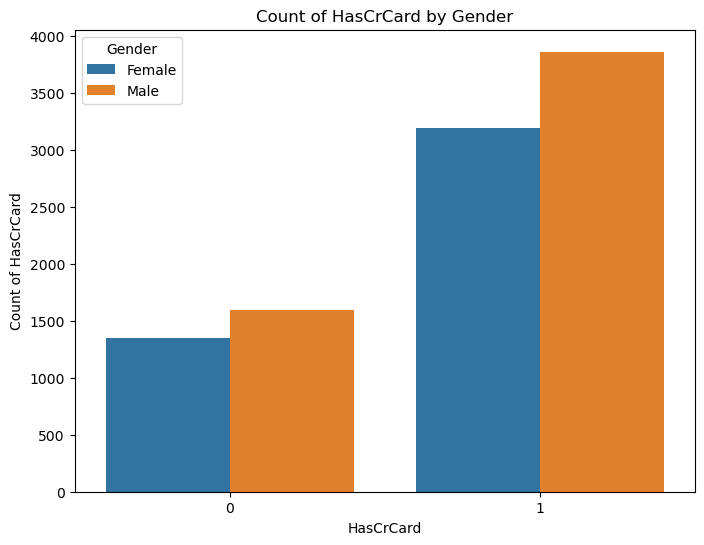

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Gender', data=df)
plt.title(f'Count of HasCrCard by Gender')
plt.xlabel('HasCrCard')
plt.ylabel('Count of HasCrCard')
plt.show

#### Multivariate Analysis

In [50]:
# Perform principal component analysis (PCA)
pca = PCA(n_components=2)
X = df1.drop("Exited", axis=1)
y = df1["Exited"]
X_pca = pca.fit_transform(X)

Text(0, 0.5, 'Balance')

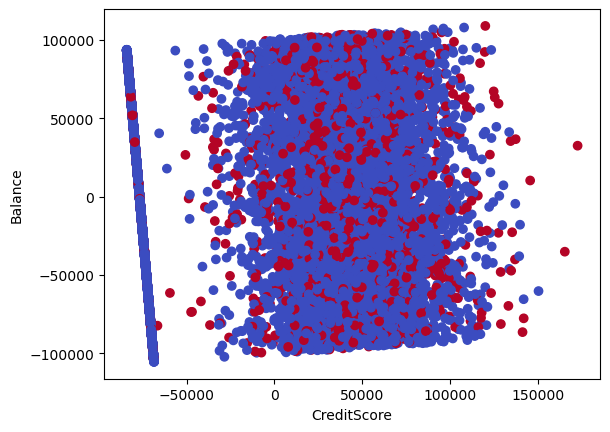

In [53]:
# Plot the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm")
plt.xlabel("CreditScore")
plt.ylabel("Balance")

In [55]:
# Perform discriminant analysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)
log_reg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.8095

### Modelling

In [58]:
# Train and apply decision tree, KNN, and random forest models
# Perform logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Perform decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Perform KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Perform random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### Evaluation

In [59]:
# Calculate evaluation metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_score_logreg = f1_score(y_test, y_pred_logreg)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

**Logistic Regression**

In [60]:
# Display evaluation metrics
#print('**Logistic Regression**')
print('Accuracy:', accuracy_logreg)
print('Precision:', precision_logreg)
print('Recall:', recall_logreg)
print('F1 Score:', f1_score_logreg)
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_logreg))

Accuracy: 0.8095
Precision: 0.5422535211267606
Recall: 0.19592875318066158
F1 Score: 0.2878504672897196
Confusion Matrix: [[1542   65]
 [ 316   77]]


**Decision Tree**

In [61]:
#print('**Decision Tree**')
print('Accuracy:', accuracy_dt)
print('Precision:', precision_dt)
print('Recall:', recall_dt)
print('F1 Score:', f1_score_dt)
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.7315
Precision: 0.32608695652173914
Recall: 0.3435114503816794
F1 Score: 0.3345724907063197
Confusion Matrix: [[1328  279]
 [ 258  135]]


**KNN**

In [62]:
print('Accuracy:', accuracy_knn)
print('Precision:', precision_knn)
print('Recall:', recall_knn)
print('F1 Score:', f1_score_knn)
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.7935
Precision: 0.4583333333333333
Recall: 0.27989821882951654
F1 Score: 0.34755134281200634
Confusion Matrix: [[1477  130]
 [ 283  110]]


**Random Forest**

In [64]:
#st.write('**Random Forest**')
print('Accuracy:', accuracy_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1 Score:', f1_score_rf)
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.732
Precision: 0.3268765133171913
Recall: 0.3435114503816794
F1 Score: 0.3349875930521092
Confusion Matrix: [[1329  278]
 [ 258  135]]


In [84]:
metrics_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "KNN", "Random Forest"],
    "Accuracy": [accuracy_logreg, accuracy_dt, accuracy_knn, accuracy_rf],
    "Precision": [precision_logreg, precision_dt, precision_knn, precision_rf],
    "Recall": [recall_logreg, recall_dt, recall_knn, recall_rf],
    "F1 Score": [f1_score_logreg, f1_score_dt, f1_score_knn, f1_score_rf],
    #"AUC-ROC": [lr_auc_roc, dt_auc_roc, rf_auc_roc]
})

In [85]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8095,0.542254,0.195929,0.287850
1,Decision Tree,0.7315,0.326087,0.343511,0.334572
2,KNN,0.7935,0.458333,0.279898,0.347551
3,Random Forest,0.7320,0.326877,0.343511,0.334988


**Perform feature selection**

In [65]:
# Perform feature selection
feature_importance = rf.feature_importances_
sorted_idx = feature_importance.argsort()
features = X.columns

**Display feature importance**

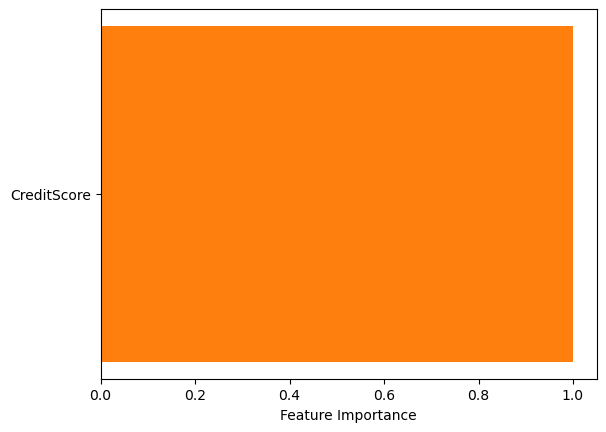

In [68]:
#st.write('**Feature Importance**')
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.show()

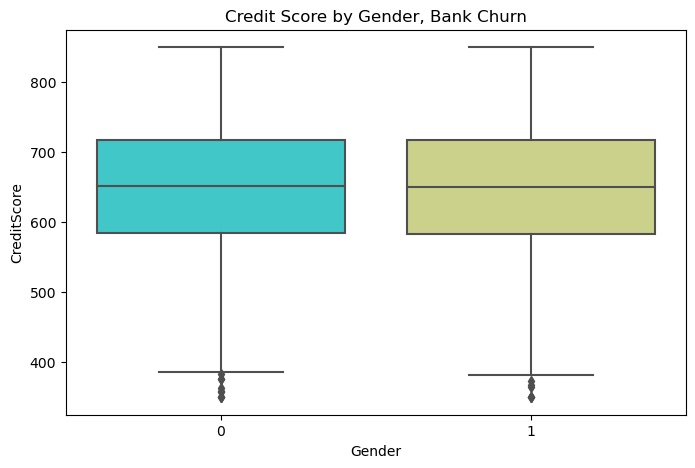

In [77]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender',y='CreditScore',data=df1, palette='rainbow')
plt.title("Credit Score by Gender, Bank Churn")
plt.show()

<Figure size 800x500 with 0 Axes>

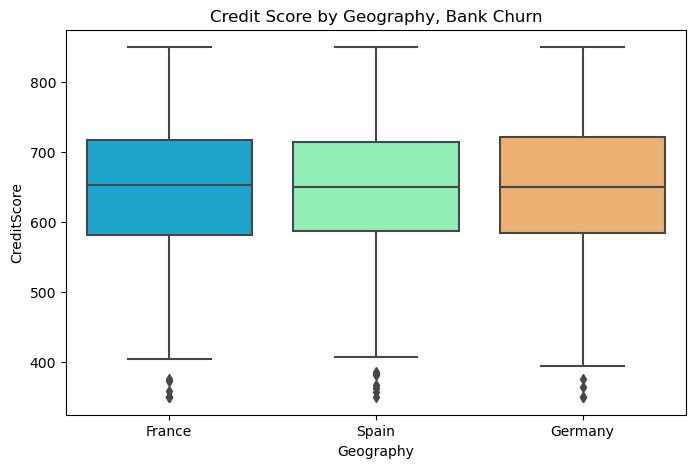

In [79]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Geography',y='CreditScore',data=df, palette='rainbow')
plt.title("Credit Score by Geography, Bank Churn")
plt.show()

In [80]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


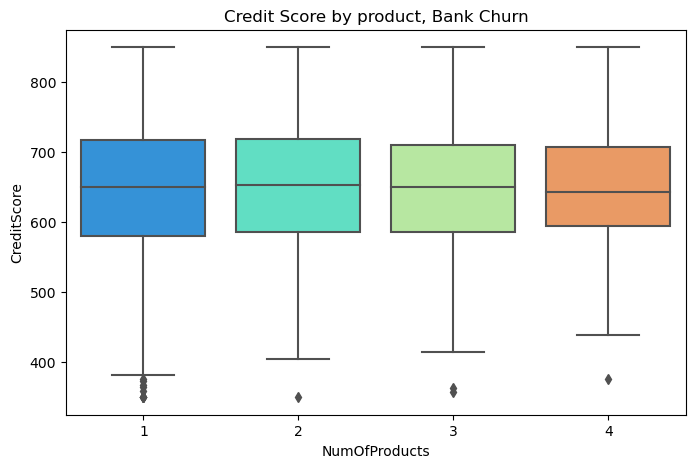

In [81]:
plt.figure(figsize=(8,5))
sns.boxplot(x='NumOfProducts',y='CreditScore',data=df, palette='rainbow')
plt.title("Credit Score by product, Bank Churn")
plt.show()

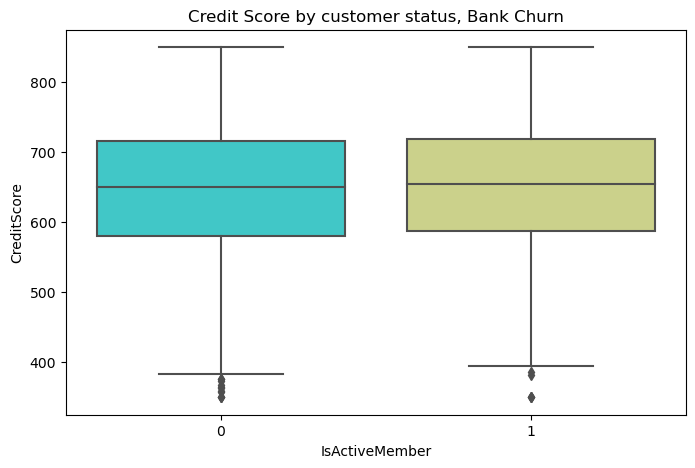

In [82]:
plt.figure(figsize=(8,5))
sns.boxplot(x='IsActiveMember',y='CreditScore',data=df, palette='rainbow')
plt.title("Credit Score by customer status, Bank Churn")
plt.show()

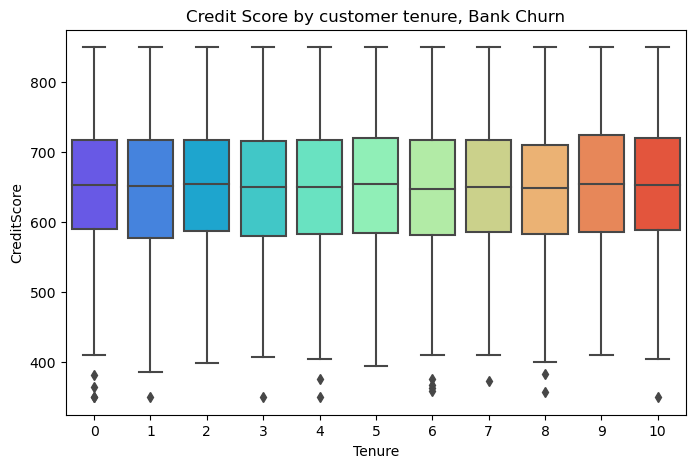

In [83]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Tenure',y='CreditScore',data=df, palette='rainbow')
plt.title("Credit Score by customer tenure, Bank Churn")
plt.show()

### Deployment

In [86]:
import joblib

In [87]:
# Save the trained model to a file
joblib.dump(logreg, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [88]:
# Load the saved model from the file
model = joblib.load('logistic_regression_model.pkl')

In [89]:
# Define a function to predict the probability of churn for a given set of features
def predict_churn_prob(features):
    prob = model.predict_proba([features])[0][1]
    return prob

In [90]:
# Get the input features from the user
CreditScore = input("Enter the customer's CreditScore: ")
Age = input("Enter the customer's Age: ")
Tenure = input("Enter the customer's Tenure: ")
Balance = input("Enter the customer's Balance: ")
NumOfProducts = input("Enter the customer's NumOfProducts: ")
HasCrCard = input("Enter whether the customer has a credit card (1 for yes, 0 for no): ")
IsActiveMember = input("Enter whether the customer is an active member (1 for yes, 0 for no): ")
EstimatedSalary = input("Enter the customer's EstimatedSalary: ")

Enter the customer's CreditScore: 680
Enter the customer's Age: 34
Enter the customer's Tenure: 4
Enter the customer's Balance: 23000
Enter the customer's NumOfProducts: 4
Enter whether the customer has a credit card (1 for yes, 0 for no): 0
Enter whether the customer is an active member (1 for yes, 0 for no): 1
Enter the customer's EstimatedSalary: 5000


In [94]:
# Convert the input features to the appropriate data type and format
#input_features = [int(CreditScore), int(Age), int(Tenure), float(Balance), int(NumOfProducts), int(HasCrCard), int(IsActiveMember), float(EstimatedSalary)]


input_features = [int(CreditScore)]

In [95]:
# Use the trained model to predict the probability of churn for the entered information
prob_churn = predict_churn_prob(input_features)

In [96]:
# Display the prediction result to the user
print("The probability of churn for the given customer is:", prob_churn)

The probability of churn for the given customer is: 1.570849667213121e-283


In [97]:
from flask import Flask, request, jsonify

In [ ]:
app = Flask(__name__)

# Load the trained model
model = joblib.load('logistic_regression_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Get the uploaded CSV file
    file = request.files['data/toyin.csv']

    # Read the CSV file into a Pandas DataFrame
    data = pd.read_csv(file)

    # Make predictions using the trained model
    predictions = model.predict(data)

    # Convert the predictions to a list
    output = predictions.tolist()

    # Return the predicted results as JSON
    return jsonify(output)

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [30/Apr/2023 23:36:01] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [30/Apr/2023 23:36:01] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
curl -X POST -F 'file=@/path/to/file.csv' http://localhost:5000/predict